In [149]:
from stockfish import Stockfish
import chess
import chess.pgn
import pandas as pd
import datetime
import tqdm
import ftfy
import scipy.stats as stats

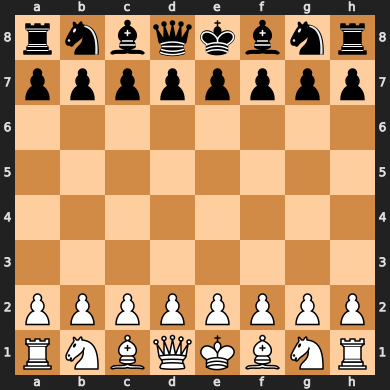

In [150]:
board = chess.Board()
board

In [151]:
stockfish = Stockfish("stockfish-windows-2022-x86-64-modern.exe")
stockfish.set_depth(20)
stockfish.set_skill_level(20)
stockfish.get_parameters()

{'Debug Log File': '',
 'Contempt': 0,
 'Min Split Depth': 0,
 'Ponder': 'false',
 'MultiPV': 1,
 'Skill Level': 20,
 'Move Overhead': 10,
 'Minimum Thinking Time': 20,
 'Slow Mover': 100,
 'UCI_Chess960': 'false',
 'UCI_LimitStrength': 'false',
 'UCI_Elo': 1350,
 'Threads': 1,
 'Hash': 16}

In [152]:
games = pd.read_csv('game_data.csv', index_col=0)
moves = games.moves[0].split(" ")
games

,rated,variant,speed,perf,createdAt,status,winner,moves,clocks,clock,ECO,opening_name,white_player,rating,black_player,rating.1
0,True,standard,blitz,blitz,2023-05-17 23:46:19.902000+00:00,resign,white,e4 e5 Nf3 d6 Bc4 h6 O-O Nf6 Re1 Nc6 c3 Na5 Bb5...,"[30003, 30003, 29947, 29803, 28979, 29651, 283...","{'initial': 300, 'increment': 0, 'totalTime': ...",C41,Philidor Defense,'chestroyer',1440,'kimura4',1393
1,True,standard,blitz,blitz,2023-05-17 23:43:32.743000+00:00,mate,black,e4 c5 Nf3 e6 d4 cxd4 Nxd4 Nc6 Nxc6 bxc6 Bc4 d5...,"[30003, 30003, 29883, 29723, 29883, 29547, 298...","{'initial': 300, 'increment': 0, 'totalTime': ...",B44,Sicilian Defense: Taimanov Variation,'kimura4',1398,'chestroyer',1435
2,True,standard,blitz,blitz,2023-05-17 23:33:19.245000+00:00,resign,black,e4 e5 Nf3 d6 d4 Nd7 Bc4 h6 O-O Ngf6 Re1 Qe7 Nc...,"[30003, 30003, 29923, 29851, 29771, 29571, 295...","{'initial': 300, 'increment': 0, 'totalTime': ...",C41,Philidor Defense: Hanham Variation,'chestroyer',1441,'kimura4',1391
3,True,standard,blitz,blitz,2023-05-17 23:28:00.728000+00:00,resign,black,e4 e5 Nf3 Nc6 Bc4 Nf6 d4 exd4 O-O Bc5 Re1 O-O ...,"[30003, 30003, 29827, 29795, 29715, 29379, 295...","{'initial': 300, 'increment': 0, 'totalTime': ...",C55,"Italian Game: Scotch Gambit, Max Lange Attack",'joservega',1465,'chestroyer',1435
4,True,standard,blitz,blitz,2023-05-17 23:14:03.641000+00:00,mate,white,e4 e5 Nf3 d6 d4 exd4 Bc4 Nf6 Qd3 Be7 c3 dxc3 N...,"[30003, 30003, 29915, 29883, 29755, 29611, 293...","{'initial': 300, 'increment': 0, 'totalTime': ...",C41,Philidor Defense: Morphy Gambit,'chestroyer',1429,'bmore1008',1425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,True,standard,rapid,rapid,2019-04-15 22:12:18.221000+00:00,timeout,white,e4 c5 Bc4 e6 e5 d5 Bb5+ Bd7 Bxd7+ Nxd7 c3 Nxe5...,"[60003, 60003, 59699, 58627, 59107, 56163, 581...","{'initial': 600, 'increment': 0, 'totalTime': ...",B20,Sicilian Defense: Bowdler Attack,'t-2wadbee-t',1241,'chestroyer',1241
1648,True,standard,blitz,blitz,2019-04-13 20:54:06.845000+00:00,resign,black,c4 Nf6 Nc3 g6 g3 Bg7 Bg2 O-O e4 Re8 d3 d6 Nf3 ...,"[18003, 18003, 17579, 18003, 17419, 17963, 172...","{'initial': 180, 'increment': 0, 'totalTime': ...",A16,"English Opening: Anglo-Indian Defense, Queen's...",'chestroyer',1500,'dancab07',1506
1649,True,standard,rapid,rapid,2019-04-13 20:43:08.889000+00:00,mate,white,e4 c6 d4 d5 e5 e6 Nf3 Ne7 Nc3 Nd7 Bd3 f6 O-O N...,"[60003, 60003, 58923, 59843, 58747, 59355, 584...","{'initial': 600, 'increment': 0, 'totalTime': ...",B12,Caro-Kann Defense: Advance Variation,'emerson88',1386,'chestroyer',1346
1650,True,standard,rapid,rapid,2019-04-12 02:55:21.683000+00:00,mate,white,e4 c6 Bc4 d5 exd5 cxd5 Bb3 Bf5 d4 e6 h3 Nc6 c3...,"[60003, 60003, 59787, 59715, 59619, 59547, 595...","{'initial': 600, 'increment': 0, 'totalTime': ...",B10,Caro-Kann Defense: Hillbilly Attack,'cyote',1546,'chestroyer',1500


In [153]:
games['rating'] = games['rating'].map(lambda x: x.split(',')[0])
games['rating.1'] = games['rating.1'].map(lambda x: x.split(',')[0])

In [154]:
games = games.loc[(games['rating'].str.isdigit() & games['rating.1'].str.isdigit()), :]

In [155]:
games['rating'] = games['rating'].astype('int')
games['rating.1'] = games['rating.1'].astype('int')

C:\Users\Sérgio\AppData\Local\Temp/ipykernel_13336/2392208362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['rating'] = games['rating'].astype('int')
C:\Users\Sérgio\AppData\Local\Temp/ipykernel_13336/2392208362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['rating.1'] = games['rating.1'].astype('int')


In [156]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1645 entries, 0 to 1651
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rated         1645 non-null   bool  
 1   variant       1645 non-null   object
 2   speed         1645 non-null   object
 3   perf          1645 non-null   object
 4   createdAt     1645 non-null   object
 5   status        1645 non-null   object
 6   winner        1586 non-null   object
 7   moves         1645 non-null   object
 8   clocks        1643 non-null   object
 9   clock         1643 non-null   object
 10  ECO           1645 non-null   object
 11  opening_name  1645 non-null   object
 12  white_player  1645 non-null   object
 13  rating        1645 non-null   int32 
 14  black_player  1645 non-null   object
 15  rating.1      1645 non-null   int32 
dtypes: bool(1), int32(2), object(13)
memory usage: 194.4+ KB


In [157]:
def elo(df, idx):
    if df=='chestroyer':
        return games.iloc[idx]['rating'] - games.iloc[idx]['rating.1']
    return -(games.iloc[idx]['rating'] - games.iloc[idx]['rating.1'])

def player_win(df, idx):
    if df=='chestroyer':
        return 'win'
    return 'loss'

In [158]:
elo_adv = []
win = []
for idx in range(len(games)):
    elo_adv.append(elo(games.iloc[idx].white_player.strip("'"), idx))
games['elo_advantage'] = elo_adv

games

C:\Users\Sérgio\AppData\Local\Temp/ipykernel_13336/863660252.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['elo_advantage'] = elo_adv


,rated,variant,speed,perf,createdAt,status,winner,moves,clocks,clock,ECO,opening_name,white_player,rating,black_player,rating.1,elo_advantage
0,True,standard,blitz,blitz,2023-05-17 23:46:19.902000+00:00,resign,white,e4 e5 Nf3 d6 Bc4 h6 O-O Nf6 Re1 Nc6 c3 Na5 Bb5...,"[30003, 30003, 29947, 29803, 28979, 29651, 283...","{'initial': 300, 'increment': 0, 'totalTime': ...",C41,Philidor Defense,'chestroyer',1440,'kimura4',1393,47
1,True,standard,blitz,blitz,2023-05-17 23:43:32.743000+00:00,mate,black,e4 c5 Nf3 e6 d4 cxd4 Nxd4 Nc6 Nxc6 bxc6 Bc4 d5...,"[30003, 30003, 29883, 29723, 29883, 29547, 298...","{'initial': 300, 'increment': 0, 'totalTime': ...",B44,Sicilian Defense: Taimanov Variation,'kimura4',1398,'chestroyer',1435,37
2,True,standard,blitz,blitz,2023-05-17 23:33:19.245000+00:00,resign,black,e4 e5 Nf3 d6 d4 Nd7 Bc4 h6 O-O Ngf6 Re1 Qe7 Nc...,"[30003, 30003, 29923, 29851, 29771, 29571, 295...","{'initial': 300, 'increment': 0, 'totalTime': ...",C41,Philidor Defense: Hanham Variation,'chestroyer',1441,'kimura4',1391,50
3,True,standard,blitz,blitz,2023-05-17 23:28:00.728000+00:00,resign,black,e4 e5 Nf3 Nc6 Bc4 Nf6 d4 exd4 O-O Bc5 Re1 O-O ...,"[30003, 30003, 29827, 29795, 29715, 29379, 295...","{'initial': 300, 'increment': 0, 'totalTime': ...",C55,"Italian Game: Scotch Gambit, Max Lange Attack",'joservega',1465,'chestroyer',1435,-30
4,True,standard,blitz,blitz,2023-05-17 23:14:03.641000+00:00,mate,white,e4 e5 Nf3 d6 d4 exd4 Bc4 Nf6 Qd3 Be7 c3 dxc3 N...,"[30003, 30003, 29915, 29883, 29755, 29611, 293...","{'initial': 300, 'increment': 0, 'totalTime': ...",C41,Philidor Defense: Morphy Gambit,'chestroyer',1429,'bmore1008',1425,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,True,standard,rapid,rapid,2019-04-15 22:12:18.221000+00:00,timeout,white,e4 c5 Bc4 e6 e5 d5 Bb5+ Bd7 Bxd7+ Nxd7 c3 Nxe5...,"[60003, 60003, 59699, 58627, 59107, 56163, 581...","{'initial': 600, 'increment': 0, 'totalTime': ...",B20,Sicilian Defense: Bowdler Attack,'t-2wadbee-t',1241,'chestroyer',1241,0
1648,True,standard,blitz,blitz,2019-04-13 20:54:06.845000+00:00,resign,black,c4 Nf6 Nc3 g6 g3 Bg7 Bg2 O-O e4 Re8 d3 d6 Nf3 ...,"[18003, 18003, 17579, 18003, 17419, 17963, 172...","{'initial': 180, 'increment': 0, 'totalTime': ...",A16,"English Opening: Anglo-Indian Defense, Queen's...",'chestroyer',1500,'dancab07',1506,-6
1649,True,standard,rapid,rapid,2019-04-13 20:43:08.889000+00:00,mate,white,e4 c6 d4 d5 e5 e6 Nf3 Ne7 Nc3 Nd7 Bd3 f6 O-O N...,"[60003, 60003, 58923, 59843, 58747, 59355, 584...","{'initial': 600, 'increment': 0, 'totalTime': ...",B12,Caro-Kann Defense: Advance Variation,'emerson88',1386,'chestroyer',1346,-40
1650,True,standard,rapid,rapid,2019-04-12 02:55:21.683000+00:00,mate,white,e4 c6 Bc4 d5 exd5 cxd5 Bb3 Bf5 d4 e6 h3 Nc6 c3...,"[60003, 60003, 59787, 59715, 59619, 59547, 595...","{'initial': 600, 'increment': 0, 'totalTime': ...",B10,Caro-Kann Defense: Hillbilly Attack,'cyote',1546,'chestroyer',1500,-46


In [ ]:
piece_scores={
    "p": 1,
    "P": -1,
    "r": 5,
    "R": -5,
    "n": 3,
    "N": -3,
    "b": 3,
    "B": -3,
    "q": 9,
    "Q": -9
}

In [159]:
def build_stored_game_analysis(game, move_number):
    row={}
    row['move_number']=move_number
    row['taken']=[]
    board=chess.Board()
    for san in game[:move_number]:
        parsed_san=board.parse_san(san)
        taken=board.piece_at(parsed_san.to_square)
        if taken:
            row['taken'].append(taken.__str__())
        move=board.push_san(san)
    row['invalid']=bool(board.promoted) or bool(board.outcome())
    stockfish_good.set_fen_position(board.fen())
    evaluation=stockfish_good.get_evaluation()
    row['evaluation']=evaluation['value']
    
    
    row['taken_score']=sum([piece_scores.get(p) for p in row['taken']])*100
    row['fen']=board.fen()
    row['url']=game['headers'].get("_others",{}).get("LichessURL","")+f"#{move_number}"
    try:
        row['last_move']=san
    except:
        print(game)
        row['invalid']=True
    return row

In [160]:
stockfish_games['fix_moves'] = stockfish_games['fix_moves'].apply(lambda x: eval(x))

TypeError: eval() arg 1 must be a string, bytes or code object

In [161]:
mygame=chess.pgn.read_game(games['moves'][0])
while mygame.next():
    mygame=mygame.next()
    print(mygame.board().fen())

AttributeError: 'str' object has no attribute 'readline'

In [66]:
build_stored_game_analysis(games['moves'][0], 2)

InvalidMoveError: invalid san: 'e'

In [162]:
games['moves'][0]

'e4 e5 Nf3 d6 Bc4 h6 O-O Nf6 Re1 Nc6 c3 Na5 Bb5+ c6 Ba4 b5 Bc2 Bg4 h3 Be6 d4 exd4 cxd4 Nc4 e5 dxe5 Nxe5 Nxe5 dxe5 Qxd1 Bxd1 Nd5 Bb3 Bb4 Bd2 Bxd2 Nxd2 a5 a4 O-O Ne4 f5 Nd6 f4 Rad1 f3 axb5 cxb5 Bxd5 Bxd5 Rxd5 fxg2 Rxb5 a4 e6 Rfd8 Nf7 Re8 Nd6 Re7 Nf5 Ree8 e7 Kf7 Rbe5 Ra6 Ne3 a3 bxa3 Rxa3 Nd5 Rxh3 Rf5+ Kg6 Rf8 Rh1+ Kxg2 Rxe1 Rxe8 Kf7 Rf8+ Ke6 e8=Q+ Kxd5 Qxe1'